Task:Exploratory Data Analysis(Retail)

Name: Shibani Sankpal

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Store_df = pd.read_csv('SampleSuperstore.csv')

In [ ]:
Store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
Store_df.shape

(9994, 13)

In [ ]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#checking for null values
Store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#checking duplicate values
Store_df.duplicated().sum()

17

In [ ]:
duplicate = Store_df.duplicated()
Store_df[duplicate]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [ ]:
#remove duplicate values
Store_df.drop_duplicates(inplace = True)

In [ ]:
#checking shape after removing duplicate values
Store_df.shape

(9977, 13)

In [ ]:
#checking duplicate values again
Store_df.duplicated().sum()

0

In [ ]:
print(Store_df.corr())

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


In [ ]:
Store_df.groupby('Ship Mode').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,54765.611834,228.497024,3.701560,0.164610,31.839948
Same Day,57536.082873,236.396179,3.609576,0.152394,29.266591
Second Class,55626.009254,236.089239,3.816452,0.138895,29.535545
Standard Class,54944.447051,227.583067,3.819873,0.160023,27.494770


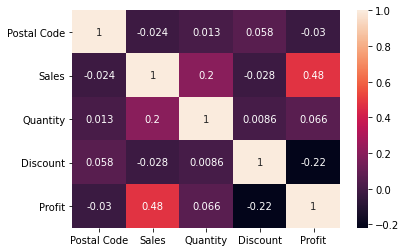

In [ ]:
corr = Store_df.corr()
sns.heatmap(corr,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


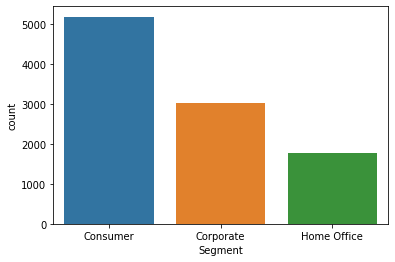

In [ ]:
sns.countplot(Store_df['Segment'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


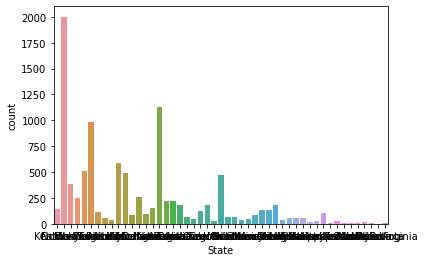

In [ ]:
sns.countplot(Store_df['State'])
plt.show()

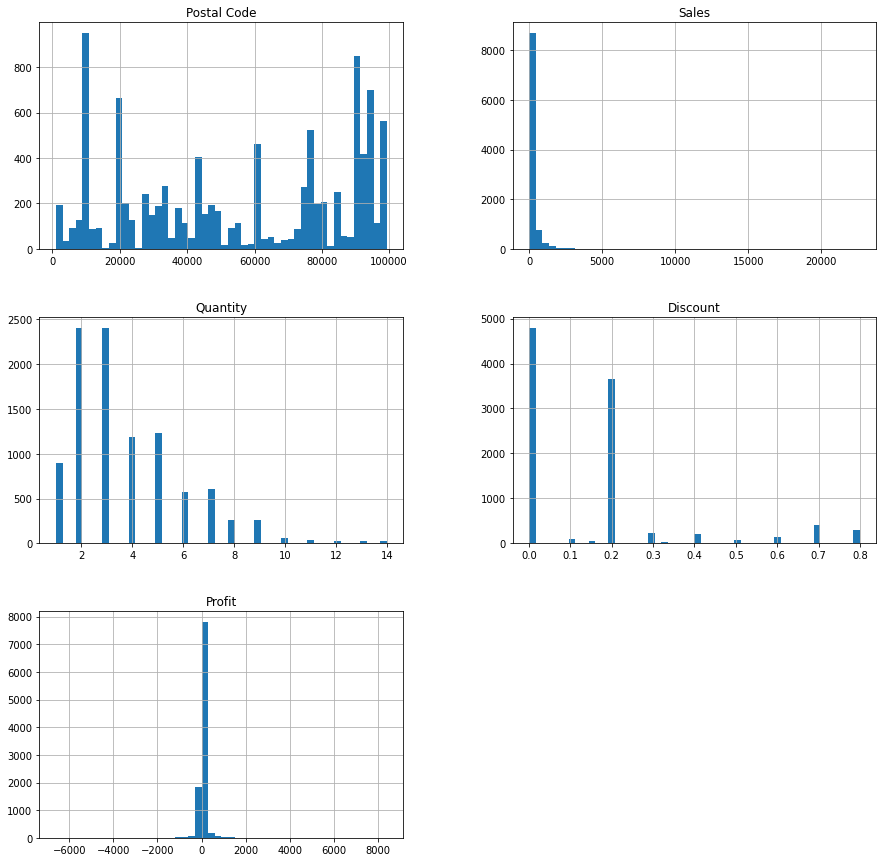

In [ ]:
Store_df.hist(figsize=(15,15), bins=50)
plt.show()

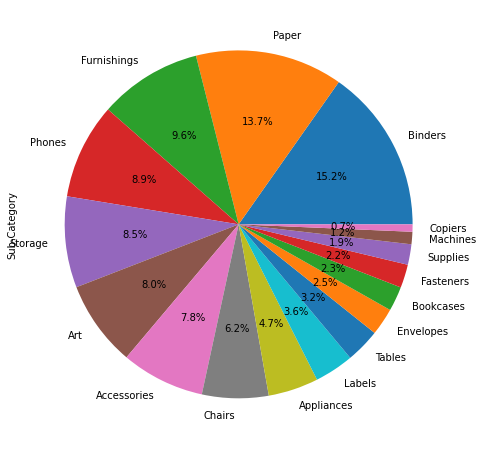

In [ ]:
plt.figure(figsize=(10,8))
Store_df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
data = Store_df[['City','Category', 'State','Sales','Profit']]
heatmap1_data = pd.pivot_table(data,values='Sales', index=["City"], columns='Category')

**Heatmap of sales in every city by category**

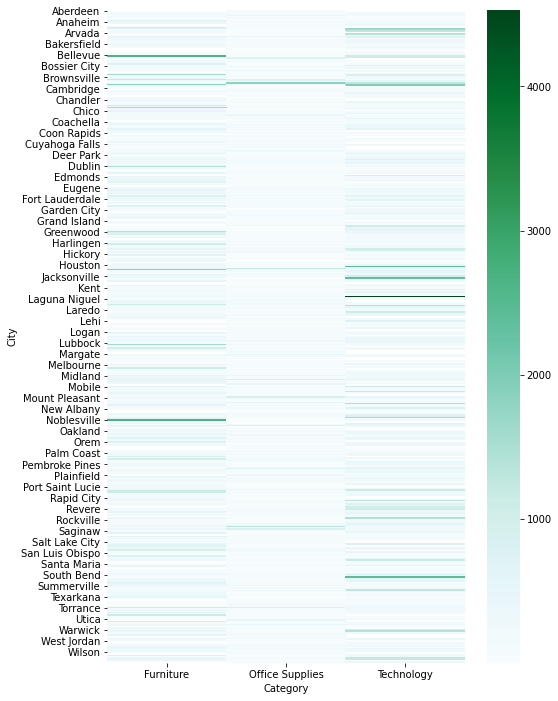

In [ ]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="BuGn")

**Heatmap of sales in every State by category**

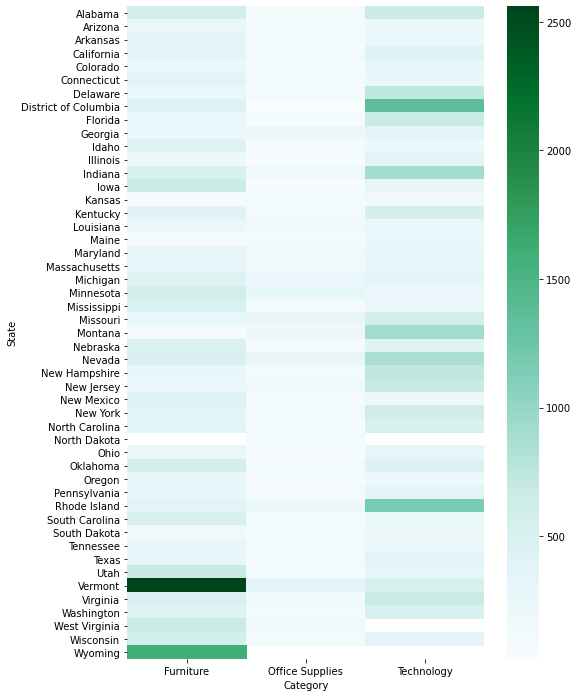

In [ ]:
heatmap2_data = pd.pivot_table(data,values='Sales', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap2_data, cmap="BuGn")

**Heatmap of profits in every state by category**

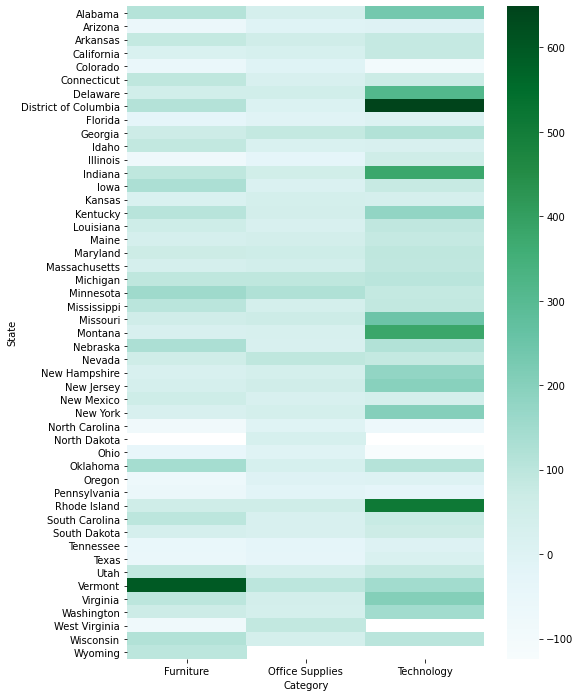

In [ ]:
heatmap3_data = pd.pivot_table(data,values='Profit', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap3_data, cmap="BuGn")

**Heatmap of profits in every city by category**

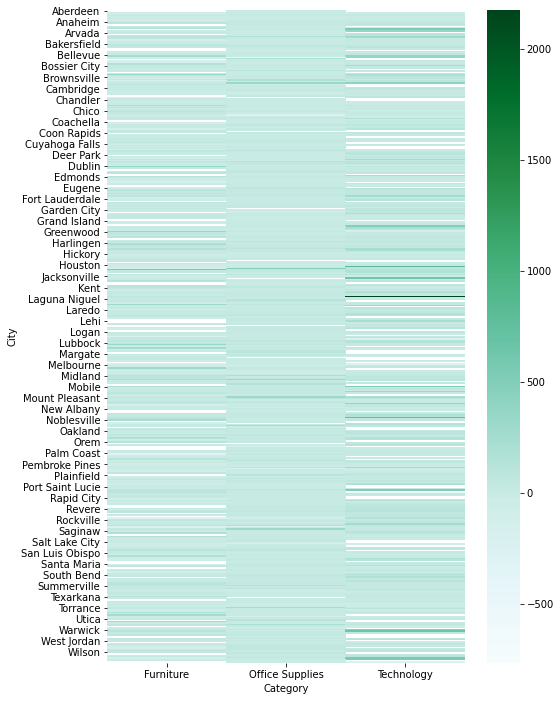

In [ ]:
heatmap4_data = pd.pivot_table(data,values='Profit', index=["City"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap4_data, cmap="BuGn")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 792x792 with 0 Axes>

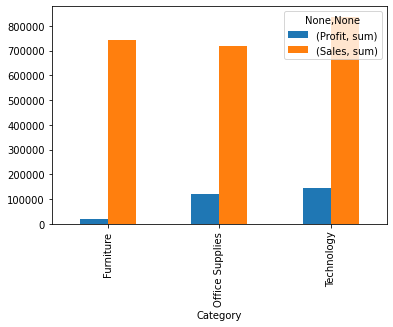

In [ ]:
plt.figure(figsize=(11,11))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()